### Generate Images

In [95]:
import pandas as pd
from matplotlib import pyplot as plt
import math

def get_visualization_tables_per_queries_user(path_general="./",data_sizes = ["1000","10000","100000"]):
    dfs = []
    for i, data_size in enumerate(data_sizes):
        stats_path = path_general+ "/results_{size}/run_stats_size_{size}.csv".format(size=data_size)
        df = pd.read_csv(stats_path)
        df.drop(columns=['start_time', 'end_time'], inplace=True)
        dfs.append(df)
    return dfs

def get_visualization_tables_per_queries_user_all(path_general="./",data_sizes = ["1000","10000","100000"]):
    dfs = []
    for i, data_size in enumerate(data_sizes):
        stats_path = path_general+ "/results_{size}/run_stats_size_{size}.csv".format(size=data_size)
        df = pd.read_csv(stats_path)
        df['scale'] = data_size
        df.drop(columns=['start_time', 'end_time'], inplace=True)
        dfs.append(df)

    df_final=pd.concat(dfs, ignore_index=True)
    return df_final
    
def get_visualization_tables_per_queries_multi_user(path_general="./",data_sizes = ["1000","10000","100000"]):
    dfs = []
    for i, data_size in enumerate(data_sizes):
        stats_path = path_general+ "/results_{size}/run_stats_size_{size}.csv_multi.csv".format(size=data_size)
        df = pd.read_csv(stats_path)
        df.drop(columns=['start_time', 'end_time'], inplace=True)
        dfs.append(df)
    return dfs
  
def get_visualization_tables_per_queries_multi_user_all(path_general="./",data_sizes = ["1000","10000","100000"]):
    dfs = []
    for i, data_size in enumerate(data_sizes):
        stats_path = path_general+ "/results_{size}/run_stats_size_{size}.csv_multi.csv".format(size=data_size)
        df = pd.read_csv(stats_path)
        df['scale'] = data_size
        df.drop(columns=['start_time', 'end_time'], inplace=True)
        dfs.append(df)

    df_final=pd.concat(dfs, ignore_index=True)

    return df_final

def get_visualization_for_overall_stats(path_general="./",data_sizes = ["1000","10000","100000"], folders=["/results_kdb", "/results_postgres"]):
    dfs=[]
    for j in folders:
        for i, data_size in enumerate(data_sizes):
            stats_path = path_general+ "{j}/results_{size}/{size}_overall_stats.csv".format(size=data_size,j=j)
            df = pd.read_csv(stats_path)
            df['scale'] = data_size
            df['DataBase'] = j.split("_")[1]
            dfs.append(df)

    df_final=pd.concat(dfs, ignore_index=True)

    return df_final

def create_mail_images(data_sizes = ["1000","10000","100000"]):
    folder_base="/Users/lauraforerocamacho/Downloads/Maestria/AdvancedDB/time-series-db-comparison/results"
    folders=["/results_kdb", "/results_postgres"]
    
    for i in folders:
        temp_folder=folder_base+i
        temp_folder_img=folder_base+"/images/"
        dfs_per_scale_factor = get_visualization_tables_per_queries_user(temp_folder,data_sizes)
        for df, data_size in zip(dfs_per_scale_factor, data_sizes):
            df_plt = df.plot(x="query_id", y="elapsed_time", kind="bar", figsize=(15,7), title=f"Query runtime for scale factor {data_size}")
            df_plt.figure.savefig(temp_folder_img+f"{i}_query_runtime_per_scale_{data_size}.png")

        df_all = get_visualization_tables_per_queries_user_all(temp_folder,data_sizes)
        df_all_plt = df_all.pivot(
            index='query_id', columns='scale', values='elapsed_time').plot(kind='bar', rot=0, figsize=(15,7), title="Query runtimes across scale factors")
        df_all_plt.figure.savefig(temp_folder_img+f"{i}_query_runtime_all_scale.png")

        df_all_multi = get_visualization_tables_per_queries_multi_user_all(temp_folder,data_sizes)
        df_all_plt_multi = df_all_multi.pivot_table(
            index='query_id', columns='scale', values='elapsed_time', aggfunc='max').plot(kind='bar', rot=0, figsize=(15,7), title="Multi query runtimes across scale factors (Max. query runtime)")
        df_all_plt_multi.figure.savefig(temp_folder_img+f"{i}_query_runtime_all_scale_multi.png")
        
    #images['all_scale_factors'] = makeCompatibleImage(df_all_plt)
    df_all_overal = get_visualization_for_overall_stats(folder_base,data_sizes,folders)
    for k in ["create_db_time","run_query_time_single","response_time_metric_multi","thorughput_metric","cost_metric"]:
        df_all_plt_overal =df_all_overal.pivot_table(
            index='DataBase', columns='scale', values=k).plot(kind='bar', rot=0, figsize=(15,7), title=f"Overall {k}")
        df_all_plt_overal.figure.savefig(temp_folder_img+f"overall_stats_{k}.png")
    
    return []

[]

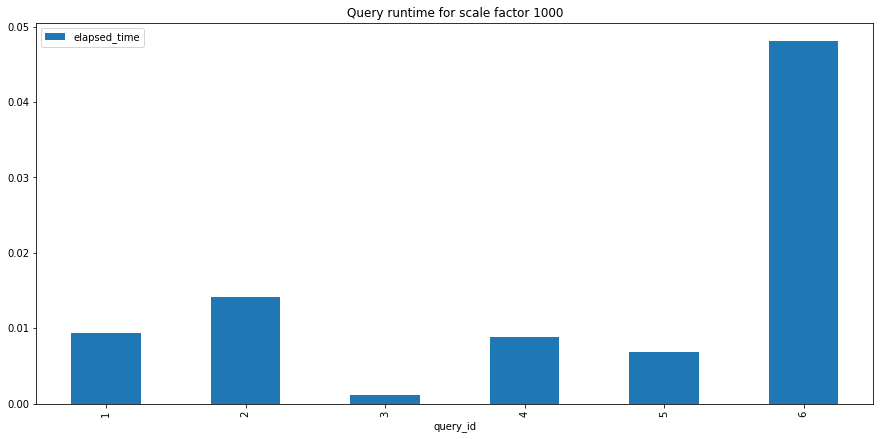

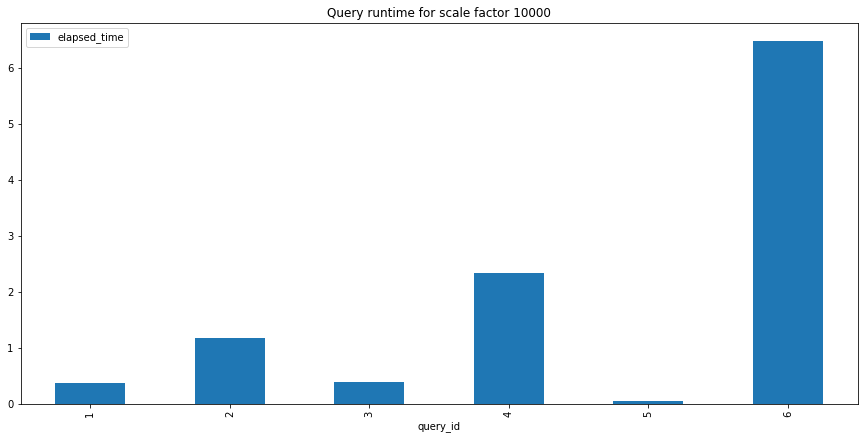

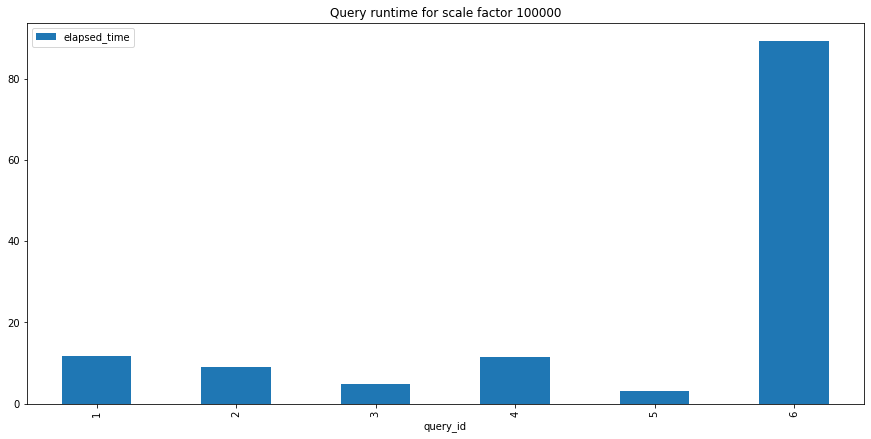

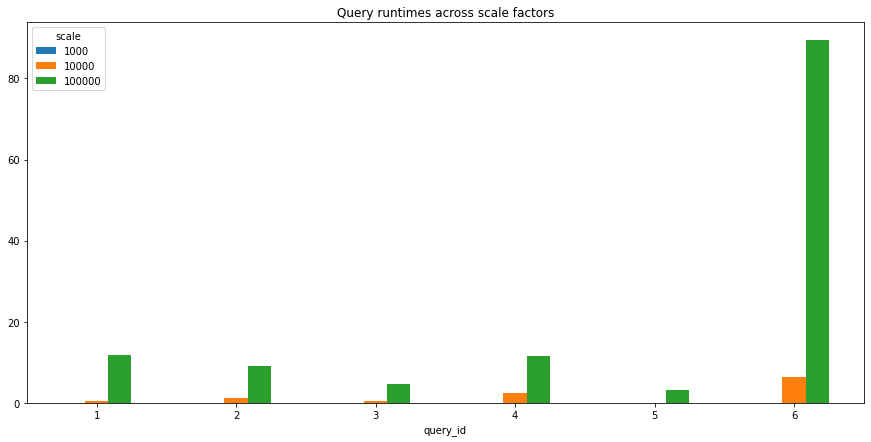

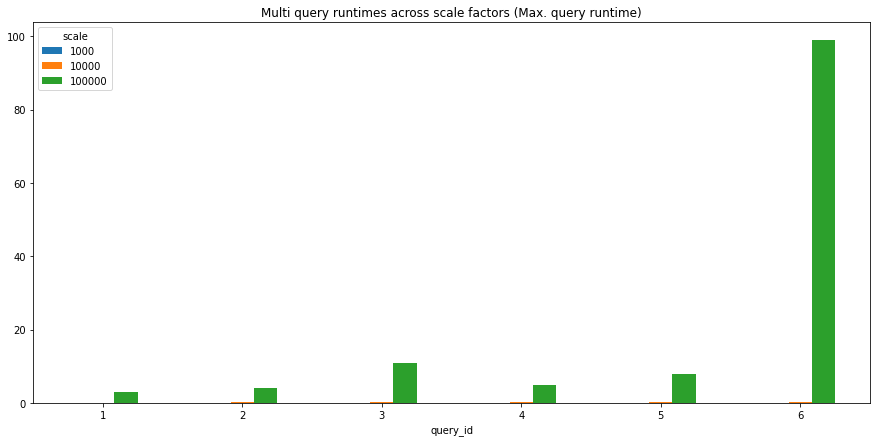

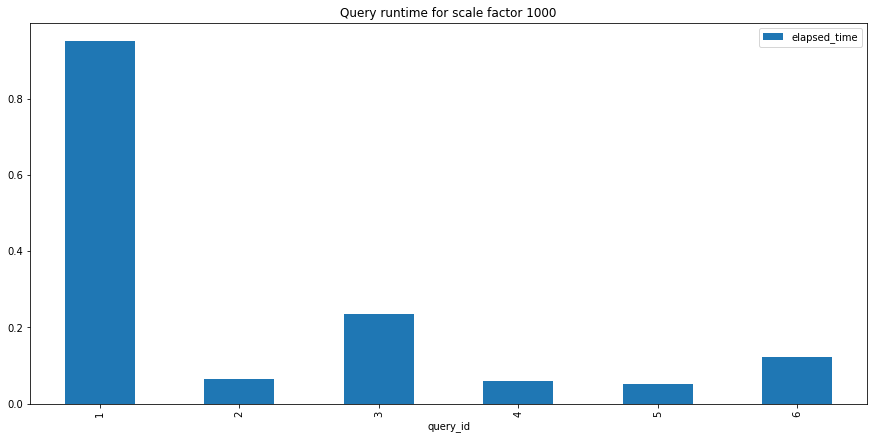

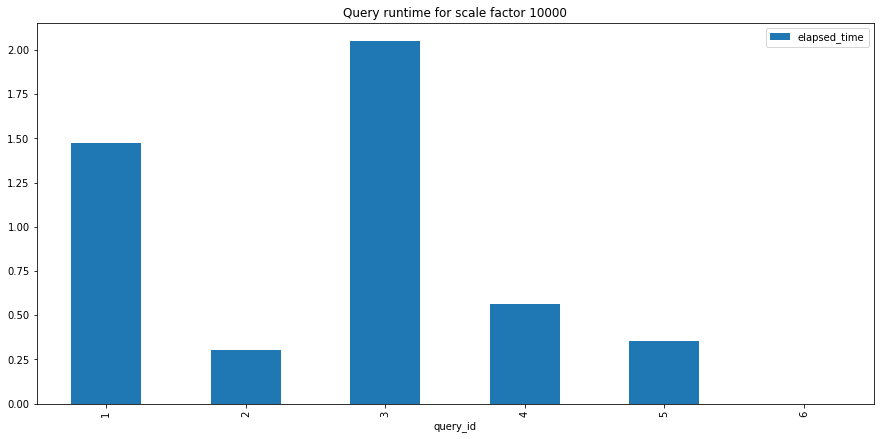

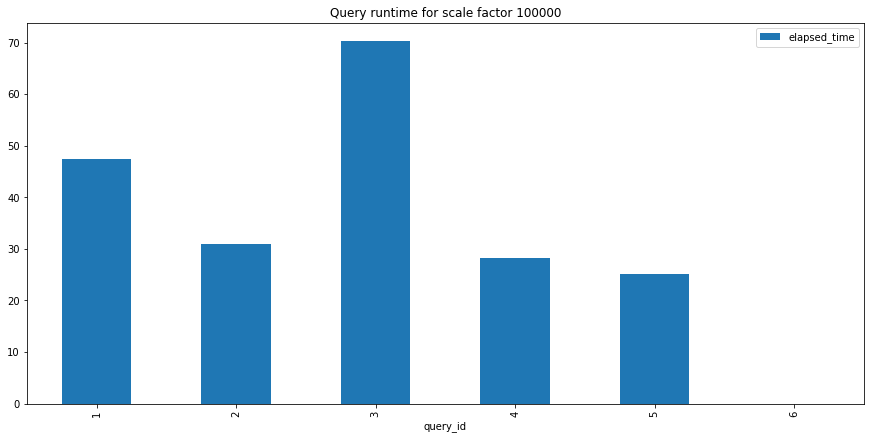

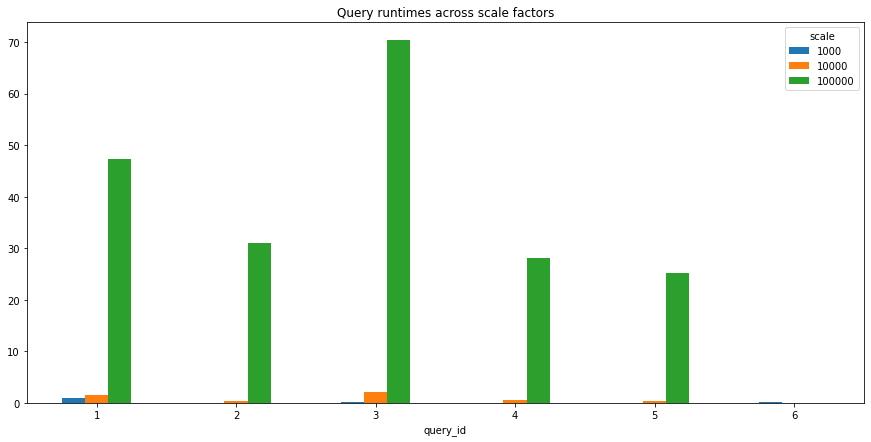

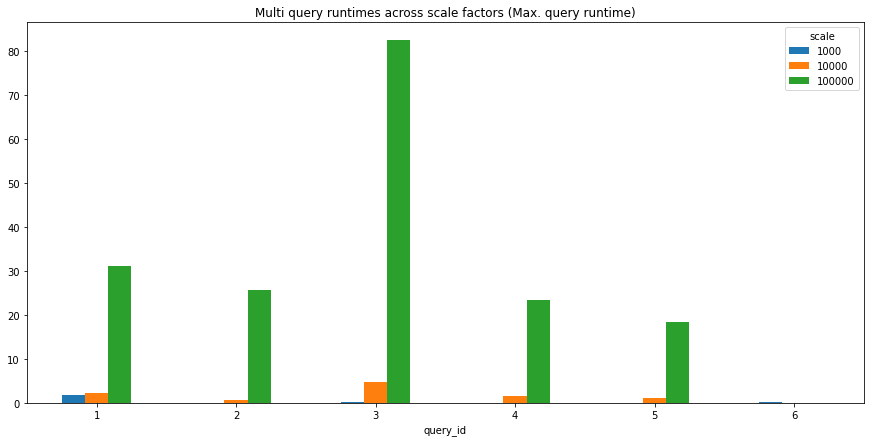

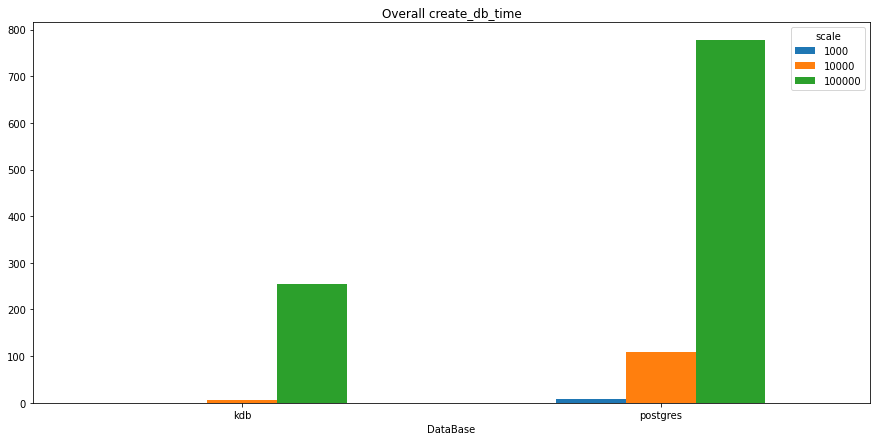

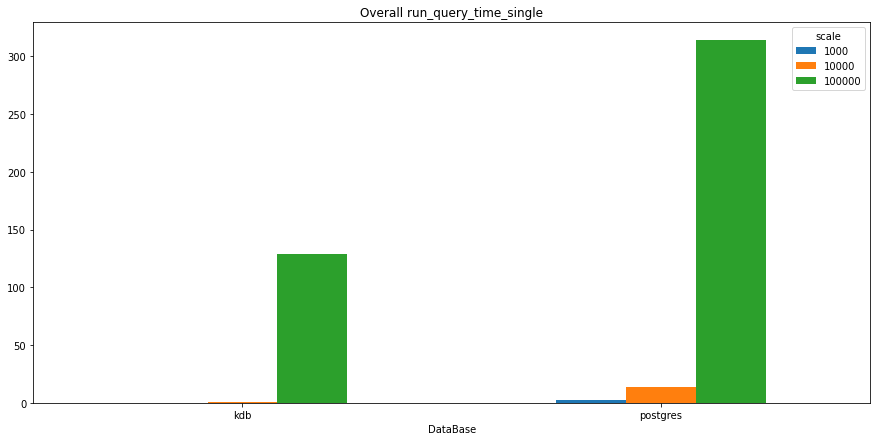

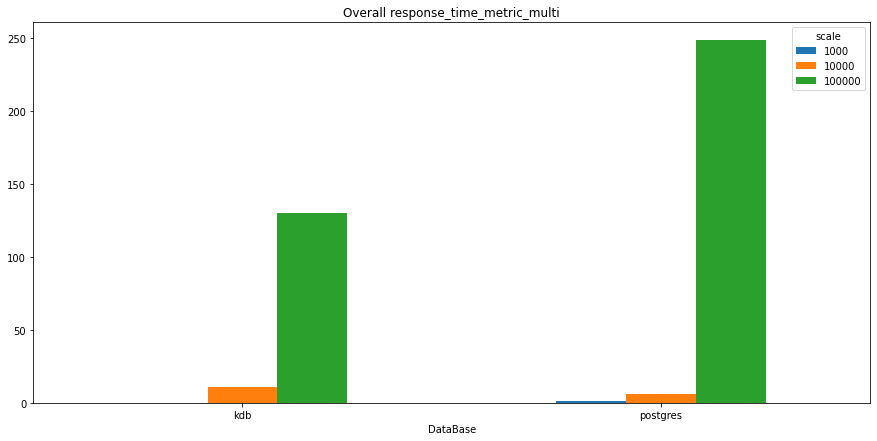

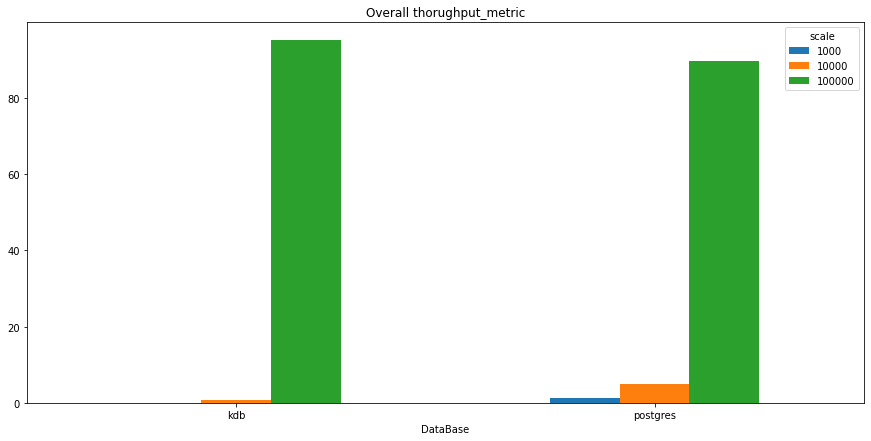

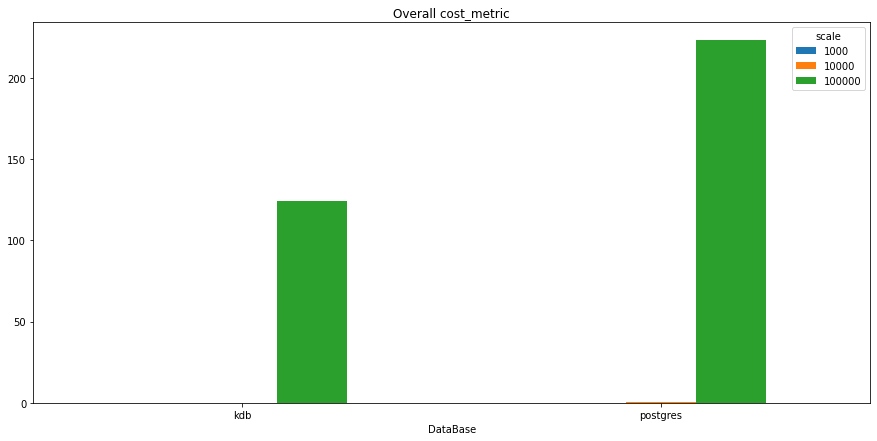

In [96]:
create_mail_images()